Name : Siddharth Byale  
USC ID :  5284615575  
Github Username: sidb98  

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE ,RFECV
from sklearn.metrics import f1_score, confusion_matrix, plot_roc_curve, roc_auc_score, classification_report,multilabel_confusion_matrix, roc_curve



## b)

In [2]:


data_path = "../../data/AReM"

test_path = []
train_path = []

for root, _ , files in os.walk(data_path):
    root = os.path.normpath(root).replace("\\","/")
    # print("Root is:",root)
    if root == "../../data/AReM":
        continue
    dirs = os.path.split(root)[-1]
    # print("Direc",dirs)
    # print("Files",files)
    # print("--------------------")
    # print(root)
    for f in files:
        file_name, file_ext = f.split(".")
        # print(file_name)
        if dirs in ['bending1', 'bending2']:
            if int(file_name[7:]) <=2:
                test_path.append(os.path.join(root, f).replace("\\","/"))
            else:
                train_path.append(os.path.join(root,f).replace("\\","/"))
        else:
            if int(file_name[7:]) <=3:
                test_path.append(os.path.join(root, f).replace("\\","/"))
            else:
                train_path.append(os.path.join(root,f).replace("\\","/"))



In [3]:
len(train_path), len(test_path)

(69, 19)

In [4]:
print(train_path)

['../../data/AReM/bending1/dataset3.csv', '../../data/AReM/bending1/dataset4.csv', '../../data/AReM/bending1/dataset5.csv', '../../data/AReM/bending1/dataset6.csv', '../../data/AReM/bending1/dataset7.csv', '../../data/AReM/bending2/dataset3.csv', '../../data/AReM/bending2/dataset4.csv', '../../data/AReM/bending2/dataset5.csv', '../../data/AReM/bending2/dataset6.csv', '../../data/AReM/cycling/dataset10.csv', '../../data/AReM/cycling/dataset11.csv', '../../data/AReM/cycling/dataset12.csv', '../../data/AReM/cycling/dataset13.csv', '../../data/AReM/cycling/dataset14.csv', '../../data/AReM/cycling/dataset15.csv', '../../data/AReM/cycling/dataset4.csv', '../../data/AReM/cycling/dataset5.csv', '../../data/AReM/cycling/dataset6.csv', '../../data/AReM/cycling/dataset7.csv', '../../data/AReM/cycling/dataset8.csv', '../../data/AReM/cycling/dataset9.csv', '../../data/AReM/lying/dataset10.csv', '../../data/AReM/lying/dataset11.csv', '../../data/AReM/lying/dataset12.csv', '../../data/AReM/lying/data

In [5]:
print(test_path)

['../../data/AReM/bending1/dataset1.csv', '../../data/AReM/bending1/dataset2.csv', '../../data/AReM/bending2/dataset1.csv', '../../data/AReM/bending2/dataset2.csv', '../../data/AReM/cycling/dataset1.csv', '../../data/AReM/cycling/dataset2.csv', '../../data/AReM/cycling/dataset3.csv', '../../data/AReM/lying/dataset1.csv', '../../data/AReM/lying/dataset2.csv', '../../data/AReM/lying/dataset3.csv', '../../data/AReM/sitting/dataset1.csv', '../../data/AReM/sitting/dataset2.csv', '../../data/AReM/sitting/dataset3.csv', '../../data/AReM/standing/dataset1.csv', '../../data/AReM/standing/dataset2.csv', '../../data/AReM/standing/dataset3.csv', '../../data/AReM/walking/dataset1.csv', '../../data/AReM/walking/dataset2.csv', '../../data/AReM/walking/dataset3.csv']


## 1 c)

i) Other than the fundamental min, max, mean, standard deviation, first quartile, and third quartile properties, correlation structure, distribution, entropy, stationarity, and scaling properties are typically utilized in time series classification.

ii)

In [6]:
feat1, feat2, feat3, feat4, feat5, feat6 = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
for path in (train_path+test_path):
    df = pd.read_csv(path, skiprows=4, error_bad_lines=False, warn_bad_lines=False)  
    col1 = df["avg_rss12"].describe()
    col1 = col1.drop(['count'])
    col1 = col1.rename(index={'mean':'mean1', 'std':'std1', 'min':'min1','25%':"first quartile1", '50%': 'median1', '75%':'third quartile1', 'max':'max1'})
    feat1 = feat1.append(col1)

    col2 = df["var_rss12"].describe()
    col2 = col2.drop(['count'])
    col2 = col2.rename(index={'mean':'mean2', 'std':'std2', 'min':'min2','25%':"first quartile2", '50%': 'median2', '75%':'third quartile2', 'max':'max2'})
    feat2 = feat2.append(col2)


    col3 = df["avg_rss13"].describe()
    col3 = col3.drop(['count'])
    col3 = col3.rename(index={'mean':'mean3', 'std':'std3', 'min':'min3','25%':"first quartile3", '50%': 'median3', '75%':'third quartile3', 'max':'max3'})
    feat3 = feat3.append(col3)

    
    col4 = df["var_rss13"].describe()
    col4 = col4.drop(['count'])
    col4 = col4.rename(index={'mean':'mean4', 'std':'std4', 'min':'min4','25%':"first quartile4", '50%': 'median4', '75%':'third quartile4', 'max':'max4'})
    feat4 = feat4.append(col4)

    
    col5 = df["avg_rss23"].describe()
    col5 = col5.drop(['count'])
    col5 = col5.rename(index={'mean':'mean5', 'std':'std5', 'min':'min5','25%':"first quartile5", '50%': 'median5', '75%':'third quartile5', 'max':'max5'})
    feat5 = feat5.append(col5)

    col6 = df["var_rss23"].describe()
    col6 = col6.drop(['count'])
    col6 = col6.rename(index={'mean':'mean6', 'std':'std6', 'min':'min6','25%':"first quartile6", '50%': 'median6', '75%':'third quartile6', 'max':'max6'})
    feat6 = feat6.append(col6)

    
feat1.reset_index(drop=True, inplace=True)
feat2.reset_index(drop=True, inplace=True)
feat3.reset_index(drop=True, inplace=True)
feat4.reset_index(drop=True, inplace=True)
feat5.reset_index(drop=True, inplace=True)
feat6.reset_index(drop=True, inplace=True)


In [7]:
df_features = pd.concat([feat1,feat2,feat3,feat4,feat5,feat6], axis =1)
print(df_features)

        mean1      std1   min1  first quartile1  median1  third quartile1  \
0   43.954500  1.558835  35.00            43.00   44.330          45.0000   
1   42.179813  3.670666  33.00            39.15   43.500          45.0000   
2   41.678063  2.243490  33.00            41.33   41.750          42.7500   
3   43.454958  1.386098  37.00            42.50   43.250          45.0000   
4   43.969125  1.618364  36.25            43.31   44.500          44.6700   
..        ...       ...    ...              ...      ...              ...   
83  43.174938  1.989052  35.50            42.50   43.670          44.5000   
84  42.760563  3.398919  32.75            41.33   44.500          45.3725   
85  34.227771  4.889576  19.33            30.50   35.500          37.7500   
86  33.509729  4.850923  12.50            30.50   34.125          36.7500   
87  34.660583  5.315110  15.00            31.00   35.000          38.2500   

     max1     mean2      std2  min2  ...  median5  third quartile5   max5  

## iii)

In [8]:
from sklearn.utils import resample
ci = pd.DataFrame(columns = ["Booststrap 90% Confidence Interval"])
alpha = 0.9
p1= ((1.0-alpha)/2.0)*100
p2 = (alpha+((1.0-alpha)/2.0)) * 100
count = len(df_features)

for c in df_features.columns:
    std= []
    for i in range(1000):
        sam = (resample(df_features[c], n_samples=count, replace =True))
        std.append(np.std(sam))
    lower_limit = np.percentile(std,p1)
    upper_limit = np.percentile(std,p2)
    ci.loc[c] = str([lower_limit,upper_limit])

print(ci)


                       Booststrap 90% Confidence Interval
mean1               [4.67117169506909, 5.871857903263196]
std1              [1.5597833020981728, 1.938258878027132]
min1              [8.222331383734163, 10.652503726907229]
first quartile1    [5.557101743878462, 6.573828117814267]
median1            [4.771319253927847, 5.960918697348766]
third quartile1    [4.329762400684257, 5.831295661474388]
max1                [3.26234527544949, 5.293100161917688]
mean2            [1.3834045477731396, 1.6925740311449275]
std2             [0.7965610658113167, 0.9390936454840073]
min2                                           [0.0, 0.0]
first quartile2  [0.8314249529620276, 1.0389861822113209]
median2          [1.2219870459776516, 1.5371773649301188]
third quartile2  [1.8930989346740446, 2.2925179062503314]
max2               [4.608523723831977, 5.376946255332905]
mean3             [3.3932354018833952, 4.471228784482884]
std3              [0.7617594137226766, 1.110462484220265]
min3          

## iv) 

Mean, max, standard deviation are the most important time domain features

## ISLR 3.7.4

Answers:  
  
a) A cubic regression would have lower train RSS than a linear regression because it would fit the training data better  

b) A cubic regression would have higher test RSS than a linear regression since it is overfitting on the training data and woudn't be able to generalize unseen data as good as a linear reagression.  

c) A cubic regression would have a lower train RSS than a linear regression because a cubic regression would fit a non linear relationship much better.

d) We dont have enough information to tell. If the true relationship is closer to linear relationship than a cubic relationship then test RSS for a linear regression would be less than cubic regression and vice-versa.

# HW 4

## 2 a) i)
Assume that you want to use the training set to classify bending from other
activities, i.e. you have a binary classification problem. Depict scatter plots
of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of
each instance, and use color to distinguish bending vs. other activities.

In [9]:
col = ["mean1", "mean2", "mean6", "max1", "max2", "max6","std1", "std2", "std6", "label"]
stats = pd.DataFrame(columns = col)
stats

,mean1,mean2,mean6,max1,max2,max6,std1,std2,std6,label


In [10]:
for file in (train_path):
    df = pd.read_csv(file, skiprows=4, error_bad_lines=False, warn_bad_lines=False)
    dirs = os.path.normpath(file).replace("\\","/")
    df_name = os.path.split(dirs)  # output = ('../../data/AReM/bending1', 'dataset3.csv')
    folder_name = os.path.split(df_name[0])     #output = ('../../data/AReM', 'bending1')

    if folder_name[-1] in ("bending1", "bending2"):
        label = 1
    else:
        label = 0
    mean1 = df["avg_rss12"].mean()
    mean2 =  df["var_rss12"].mean()
    mean6 = df["var_rss23"].mean()

    max1 = df["avg_rss12"].max()
    max2 =  df["var_rss12"].max()
    max6 = df["var_rss23"].max()

    std1 = df["avg_rss12"].std()
    std2 =  df["var_rss12"].std()
    std6 = df["var_rss23"].std()

    temp_df = pd.DataFrame({"mean1": mean1, "mean2": mean2,"mean6": mean6, "max1": max1, "max2": max2,"max6": max6,
    "std1": std1, "std2": std2,"std6": std6, "label":label}, index=[0])

    stats = pd.concat([stats,temp_df]).reset_index(drop=True)

print(stats)

        mean1     mean2     mean6   max1   max2   max6      std1      std2  \
0   43.954500  0.426250  0.493292  47.40   1.70   1.79  1.558835  0.338690   
1   42.179813  0.696042  0.613521  47.75   3.00   2.18  3.670666  0.630860   
2   41.678063  0.535979  0.383292  45.75   2.83   1.79  2.243490  0.405469   
3   43.454958  0.378083  0.679646  48.00   1.58   5.26  1.386098  0.315566   
4   43.969125  0.413125  0.555313  48.00   1.50   2.96  1.618364  0.263111   
..        ...       ...       ...    ...    ...    ...       ...       ...   
64  34.763333  4.223792  3.288271  46.25  12.68   9.39  4.742208  2.278004   
65  34.935813  4.115750  3.280021  51.00  12.21  10.21  4.645944  2.335243   
66  34.333042  4.396958  3.261583  47.67  12.48   8.01  4.948770  2.568680   
67  34.599875  4.398833  3.289542  45.75  15.37   8.86  4.731790  2.538521   
68  34.225875  4.354500  3.479542  43.67  17.24   9.42  4.441798  2.518991   

        std6 label  
0   0.513506     1  
1   0.524317     1  


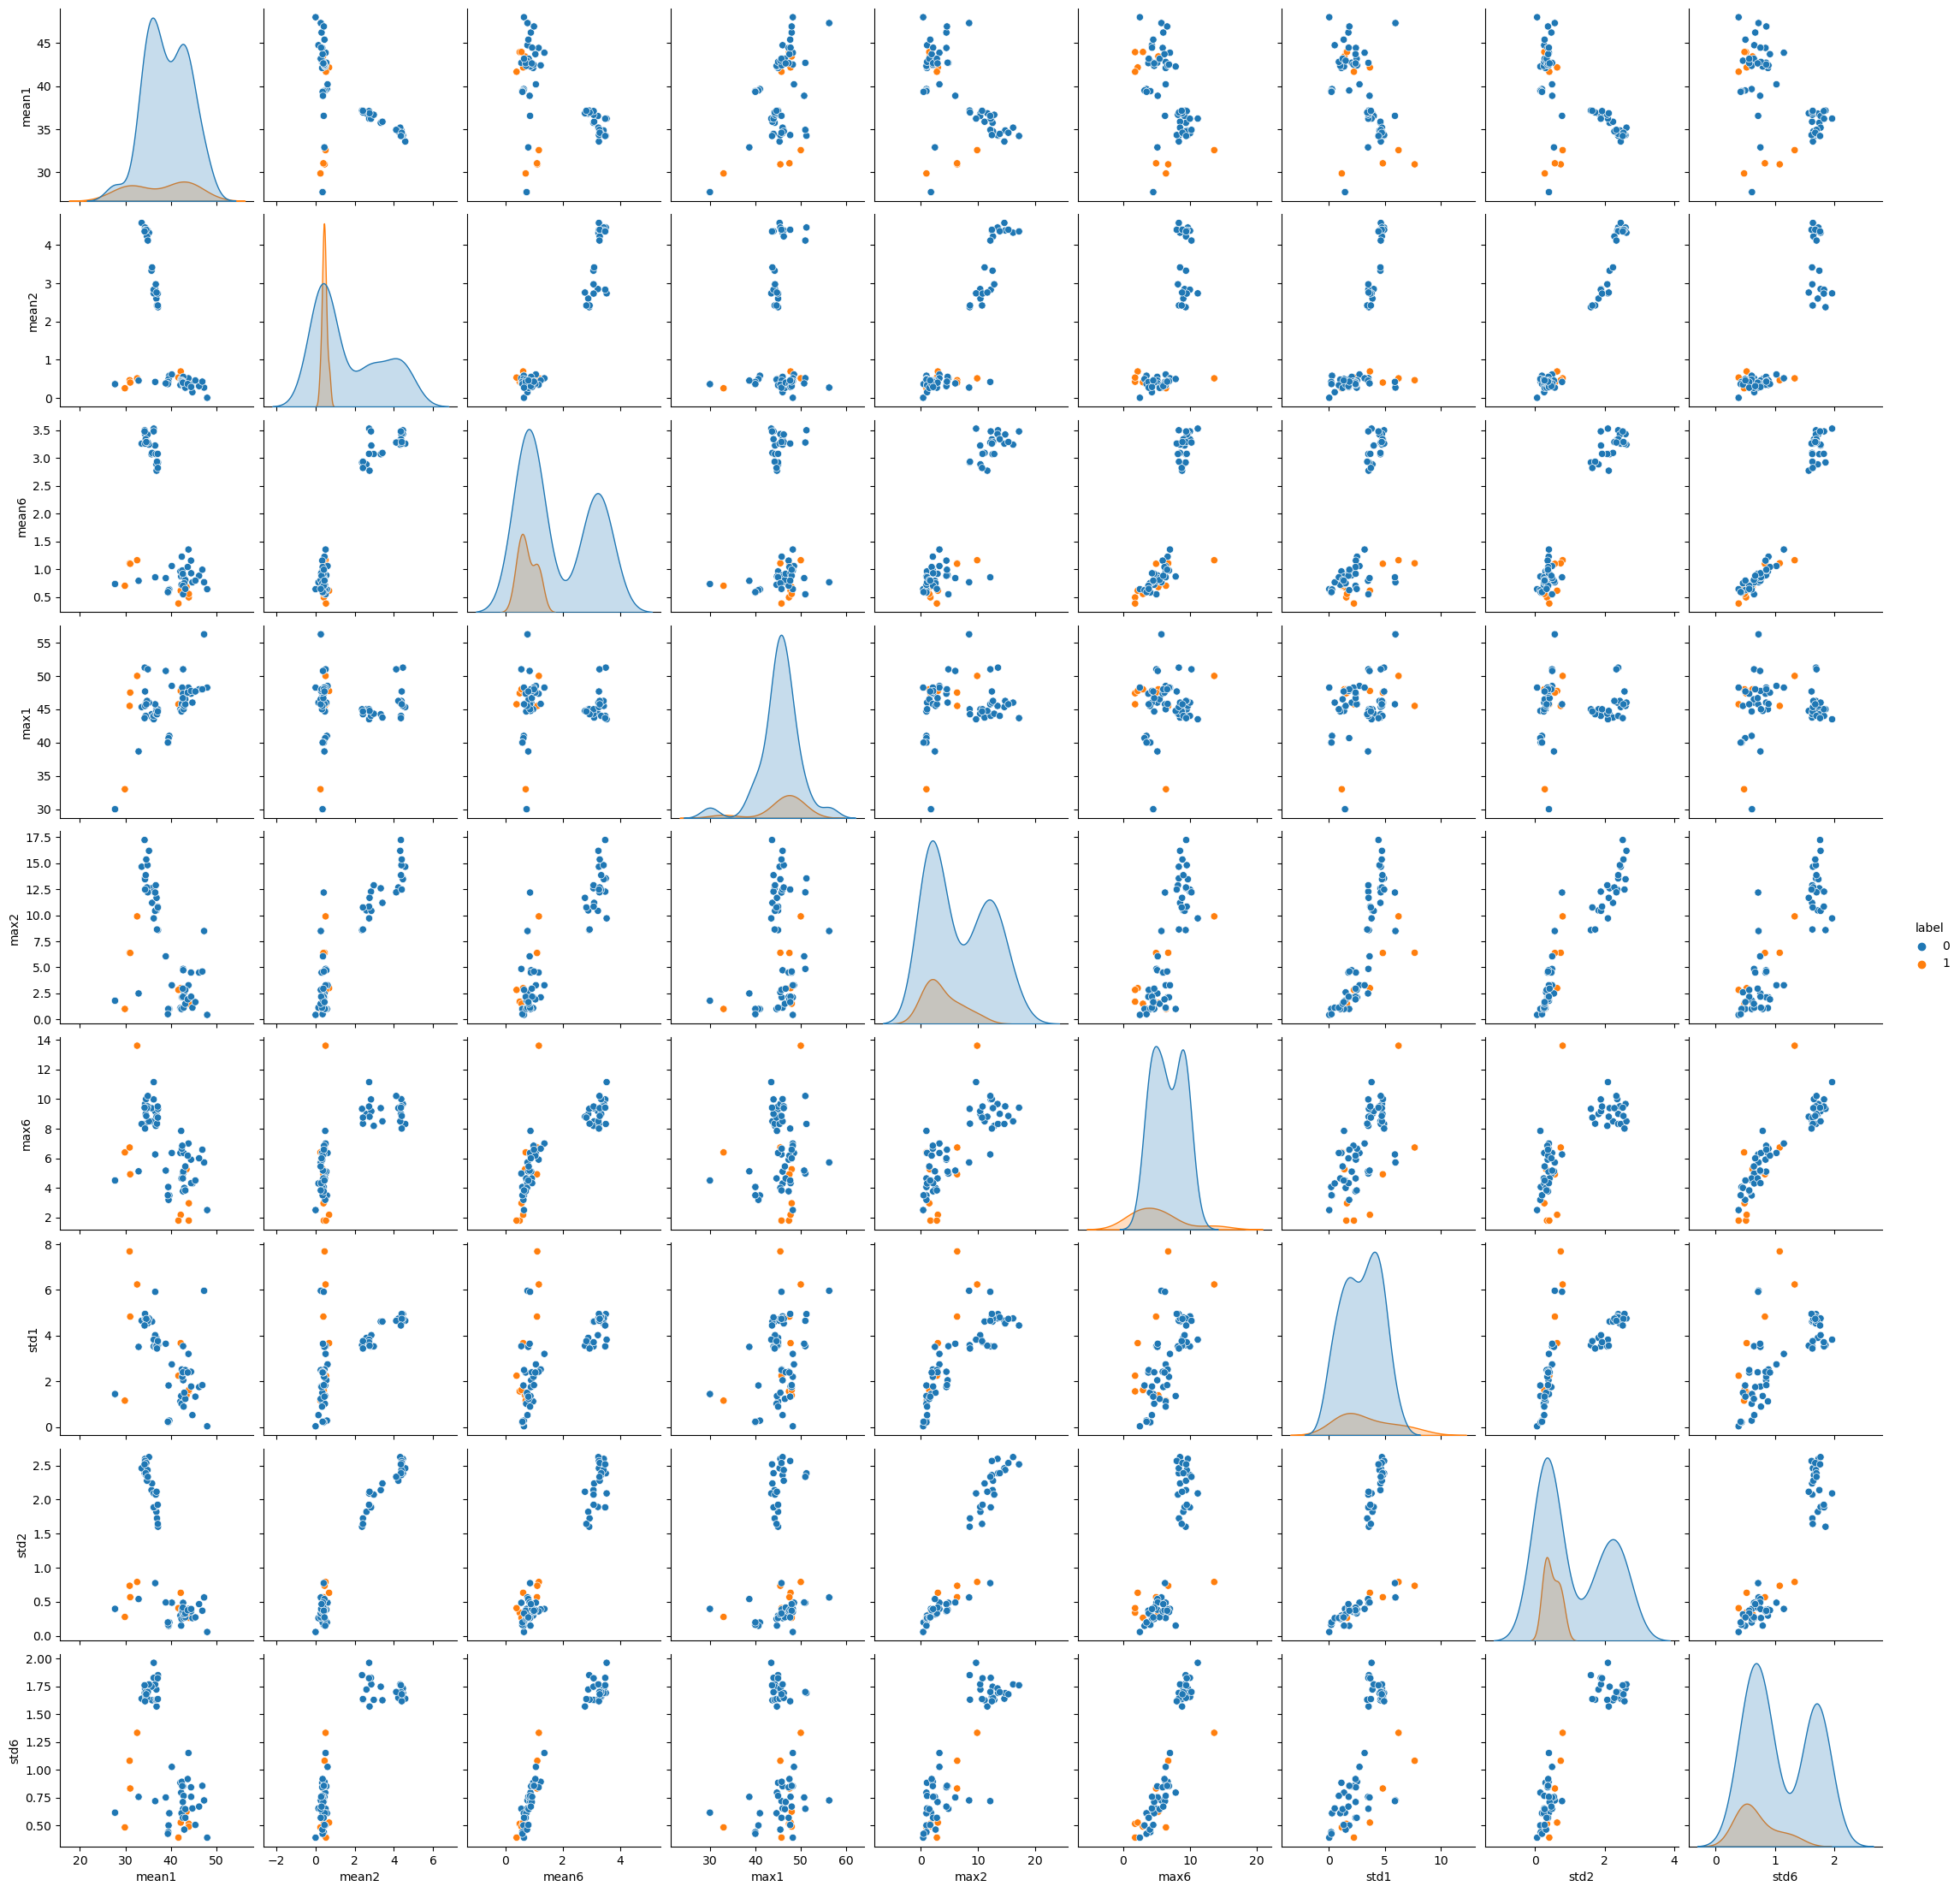

In [11]:
sns.pairplot(stats, hue='label')

## 2 a) ii) 
Break each time series in your training set into two (approximately) equal
length time series. Now instead of 6 time series for each of the training
instances, you have 12 time series for each training instance. Repeat the
experiment in 4(a)i, i.e depict scatter plots of the features extracted from both
parts of the time series 1,2, and 6. Do you see any considerable difference in
the results with those of 4(a)i?

In [12]:
col = ["mean1", "mean2", "mean6", "max1", "max2", "max6","std1", "std2", "std6", "label"]
stats1 = pd.DataFrame(columns = col)
stats1

,mean1,mean2,mean6,max1,max2,max6,std1,std2,std6,label


In [13]:
label = 0
for file in (train_path):
    df = pd.read_csv(file, skiprows=4, nrows=240 ,error_bad_lines=False, warn_bad_lines=False)
    dirs = os.path.normpath(file).replace("\\","/")
    df_name = os.path.split(dirs)  # output = ('../../data/AReM/bending1', 'dataset3.csv')
    folder_name = os.path.split(df_name[0])     #output = ('../../data/AReM', 'bending1')

    mean1 = df["avg_rss12"].mean()
    mean2 =  df["var_rss12"].mean()
    mean6 = df["var_rss23"].mean()

    max1 = df["avg_rss12"].max()
    max2 =  df["var_rss12"].max()
    max6 = df["var_rss23"].max()

    std1 = df["avg_rss12"].std()
    std2 =  df["var_rss12"].std()
    std6 = df["var_rss23"].std()

    temp_df = pd.DataFrame({"mean1": mean1, "mean2": mean2,"mean6": mean6, "max1": max1, "max2": max2,"max6": max6,
    "std1": std1, "std2": std2,"std6": std6, "label":label}, index=[0])

    stats1 = pd.concat([stats1,temp_df]).reset_index(drop=True)

print(stats1)

        mean1     mean2     mean6   max1   max2  max6      std1      std2  \
0   44.057167  0.381042  0.598250  46.50   1.50  1.79  1.556971  0.329540   
1   43.278875  0.673292  0.640958  47.75   3.00  1.53  3.473355  0.634285   
2   41.621208  0.623083  0.419083  45.75   2.83  1.79  3.118644  0.489595   
3   44.117042  0.250042  0.815417  48.00   1.30  5.26  1.359836  0.314099   
4   43.486208  0.378667  0.524875  45.00   1.30  2.28  1.281976  0.284434   
..        ...       ...       ...    ...    ...   ...       ...       ...   
64  34.966250  4.207958  3.146333  46.00  12.68  8.83  4.733014  2.331940   
65  34.737042  4.217333  3.334125  45.67  12.21  9.19  4.276717  2.337759   
66  33.886458  4.332208  3.248417  45.00  12.44  7.89  5.143776  2.453111   
67  34.836458  4.257750  3.169625  44.00  12.38  8.86  4.869092  2.512633   
68  34.329333  4.315917  3.381250  42.75  14.50  9.42  4.549837  2.470266   

        std6 label  
0   0.526656     0  
1   0.554542     0  
2   0.411200

In [14]:
col = ["mean1", "mean2", "mean6", "max1", "max2", "max6","std1", "std2", "std6", "label"]
stats2 = pd.DataFrame(columns = col)
stats2

,mean1,mean2,mean6,max1,max2,max6,std1,std2,std6,label


In [15]:
header_name = ["time","avg_rss12","var_rss12","avg_rss13","var_rss13","avg_rss23","var_rss23"]
label = 1
for file in (train_path):
    df = pd.read_csv(file, skiprows=245, error_bad_lines=False, warn_bad_lines=False, header=None, names=header_name)
    dirs = os.path.normpath(file).replace("\\","/")
    df_name = os.path.split(dirs)  # output = ('../../data/AReM/bending1', 'dataset3.csv')
    folder_name = os.path.split(df_name[0])     #output = ('../../data/AReM', 'bending1')
    
    mean1 = df["avg_rss12"].mean()
    mean2 =  df["var_rss12"].mean()
    mean6 = df["var_rss23"].mean()

    max1 = df["avg_rss12"].max()
    max2 =  df["var_rss12"].max()
    max6 = df["var_rss23"].max()

    std1 = df["avg_rss12"].std()
    std2 =  df["var_rss12"].std()
    std6 = df["var_rss23"].std()

    temp_df = pd.DataFrame({"mean1": mean1, "mean2": mean2,"mean6": mean6, "max1": max1, "max2": max2,"max6": max6,
    "std1": std1, "std2": std2,"std6": std6, "label":label}, index=[0])

    stats2 = pd.concat([stats2,temp_df]).reset_index(drop=True)

print(stats2)

        mean1     mean2     mean6   max1   max2   max6      std1      std2  \
0   43.851833  0.471458  0.388333  47.40   1.70   1.50  1.557168  0.342346   
1   41.080750  0.718792  0.586083  46.00   2.86   2.18  3.537481  0.627915   
2   41.734917  0.448875  0.347500  43.67   1.12   1.50  0.595920  0.273050   
3   42.792875  0.506125  0.543875  46.50   1.58   4.06  1.058792  0.260761   
4   44.452042  0.447583  0.585750  48.00   1.50   2.96  1.771251  0.235493   
..        ...       ...       ...    ...    ...    ...       ...       ...   
64  34.560417  4.239625  3.430208  46.25  12.09   9.39  4.752584  2.227526   
65  35.134583  4.014167  3.225917  51.00  11.41  10.21  4.989014  2.333172   
66  34.779625  4.461708  3.274750  47.67  12.48   8.01  4.714249  2.682846   
67  34.363292  4.539917  3.409458  45.75  15.37   8.84  4.588342  2.561608   
68  34.122417  4.393083  3.577833  43.67  17.24   9.12  4.338107  2.571376   

        std6 label  
0   0.478528     1  
1   0.491873     1  


In [16]:
stats_combined = pd.concat([stats1,stats2]).reset_index(drop=True)
stats_combined

,mean1,mean2,mean6,max1,max2,max6,std1,std2,std6,label
0,44.057167,0.381042,0.598250,46.50,1.50,1.79,1.556971,0.329540,0.526656,0
1,43.278875,0.673292,0.640958,47.75,3.00,1.53,3.473355,0.634285,0.554542,0
2,41.621208,0.623083,0.419083,45.75,2.83,1.79,3.118644,0.489595,0.411200,0
3,44.117042,0.250042,0.815417,48.00,1.30,5.26,1.359836,0.314099,0.718016,0
4,43.486208,0.378667,0.524875,45.00,1.30,2.28,1.281976,0.284434,0.486847,0
...,...,...,...,...,...,...,...,...,...,...
133,34.560417,4.239625,3.430208,46.25,12.09,9.39,4.752584,2.227526,1.647979,1
134,35.134583,4.014167,3.225917,51.00,11.41,10.21,4.989014,2.333172,1.665326,1
135,34.779625,4.461708,3.274750,47.67,12.48,8.01,4.714249,2.682846,1.670593,1
136,34.363292,4.539917,3.409458,45.75,15.37,8.84,4.588342,2.561608,1.707089,1


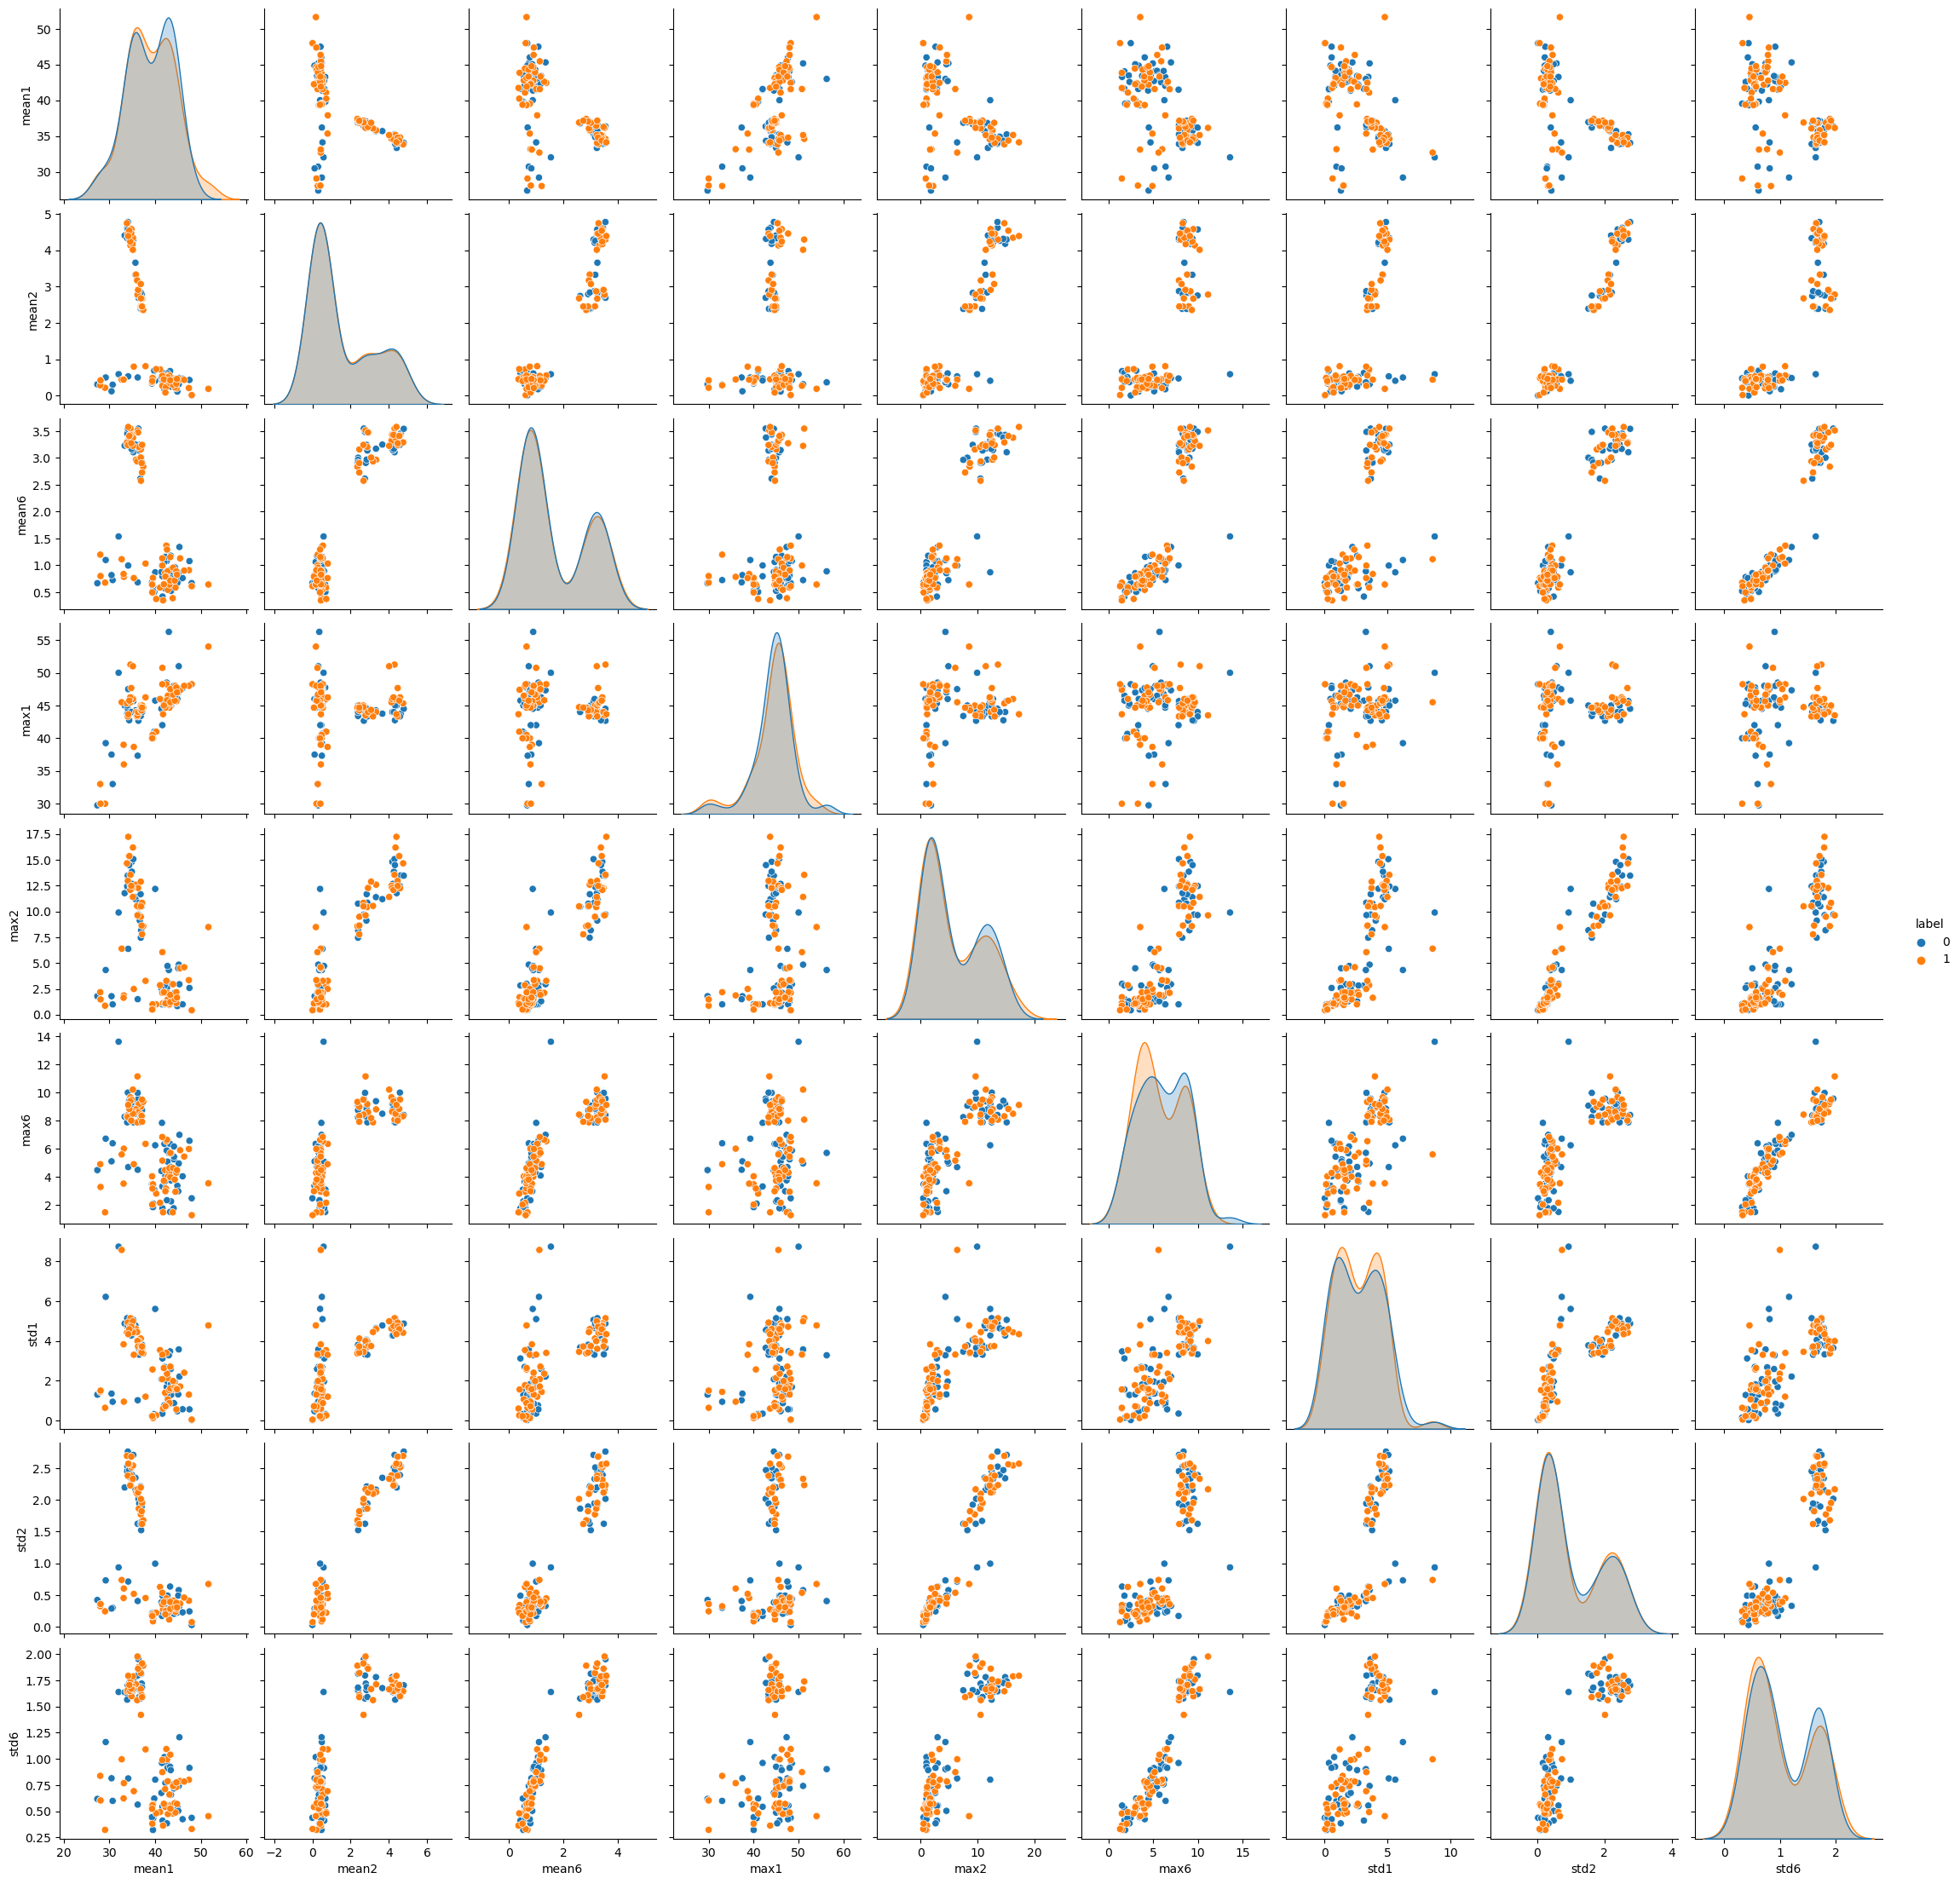

In [17]:
sns.pairplot(stats_combined, hue='label')

we can see that the distributions are slightly different but look similar to the pair plot generated in 2 a) i)


## 2 a) iii)
Break each time series in your training set into l ∈ {1,2,...,20} time series
of approximately equal length and use logistic regression5 to solve the binary
classification problem, using time-domain features.

Right way to do cross validation : all the features should be included while performing cross validation  
Wrong way: features are selected before we do cross validation  

In [18]:
def create_dataset(path,l,label_class):

    if label_class == "multi":
        label_dict ={"bending1":1,"bending2":1, "cycling":2, "lying":3, "sitting":4, "standing":5, "walking":6}
    if label_class == "binary":
        label_dict ={"bending1":1,"bending2":1, "cycling":0, "lying":0, "sitting":0, "standing":0, "walking":0}

    col_names = []
    for k in range(1,(l*6)+1):
        col_names.extend(["mean"+str(k),"max"+str(k),"std"+str(k)])

    final_df = pd.DataFrame(columns = col_names)
    label = []

    for file in path:
        folder_path = os.path.split(file)[0]
        folder_name = os.path.split(folder_path)[-1]
        df = pd.read_csv(file, skiprows=4, error_bad_lines=False, warn_bad_lines=False)
        df = df.iloc[:,1:]      # removing time col
        row = 0
        sample_size = len(df)//l
        described_df = pd.DataFrame(columns=['mean', 'max', 'std'])
        

        for i in range(l):
            temp = df.iloc[row:,:]  if i == (l-1) else df.iloc[row:row+sample_size,:]
            row += sample_size
            temp = temp.describe().T[['mean', 'max', 'std']]

            # print("-----------------------")
            # print(temp)
            described_df = pd.concat([described_df, temp]).reset_index(drop=True)

        transformed_described_df = pd.DataFrame(described_df.to_numpy().reshape(1,-1), columns = col_names)
        final_df = pd.concat([final_df, transformed_described_df]).reset_index(drop=True)
        label.append(label_dict[folder_name])


    final_df['label'] = label
    #print(final_df.shape)

    X_train = final_df.iloc[:,:-1]
    y_train = final_df.iloc[:,-1]

    return (X_train,y_train)  
    


In [19]:
# Binary Logistic Classifier with RFECV 
# train data
rankinf_df = pd.DataFrame(columns=["l","p","ranking"])
for l in range(1,21):

    X_train, y_train = create_dataset(train_path, l, "binary")
    
    regressor = LogisticRegression(max_iter=200)
    rfecv = RFECV(estimator = regressor, cv=StratifiedKFold(5), scoring='accuracy', n_jobs = -1)
    rfecv = rfecv.fit(X_train, y_train)
    #print("model ran for l=",l)
    rankinf_df = rankinf_df.append({"l":l,"p":sum(rfecv.support_),"ranking":max(rfecv.ranking_)},ignore_index=True)
print(rankinf_df) 
            


     l   p ranking
0    1  10       9
1    2   4      33
2    3   1      54
3    4   1      72
4    5   1      90
5    6   8     101
6    7   9     118
7    8   9     136
8    9  15     148
9   10   1     180
10  11  16     183
11  12  10     207
12  13   1     234
13  14   1     252
14  15   7     264
15  16   8     281
16  17   6     301
17  18  14     311
18  19   7     336
19  20  20     341


(l, p) is (1,10) and ranking 9  
This has the highest ranking

## 2) a) iv)
Report the confusion matrix and show the ROC and AUC for your classifier
on train data. Report the parameters of your logistic regression βi’s as well
as the p-values associated with them.

In [20]:
#For l=1 best Binary Logistic Model
#Train Data

l= 1

X_train, y_train = create_dataset(train_path, l, "binary")
  
regressor_train = LogisticRegression(max_iter=200)
rfecv_train = RFECV(estimator = regressor_train, cv=StratifiedKFold(5), scoring='accuracy', n_jobs = -1)
rfecv_train = rfecv_train.fit(X_train, y_train)

pruned_features_train = X_train[X_train.columns[rfecv_train.support_]]
pruned_features_train.columns



Index(['mean1', 'max2', 'mean3', 'max3', 'mean4', 'mean5', 'max5', 'std5',
       'mean6', 'max6'],
      dtype='object')

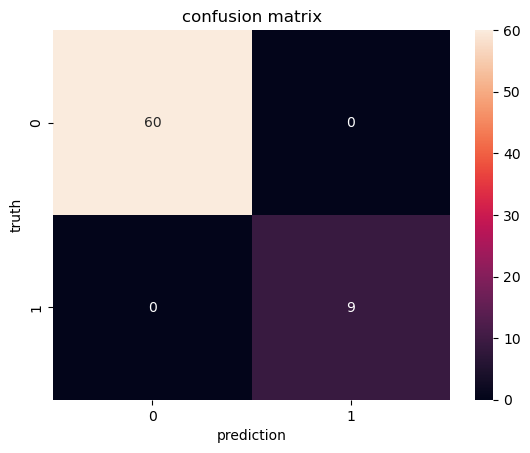

In [21]:
from sklearn import preprocessing

selected_X_train = pruned_features_train
regressor = LogisticRegression(max_iter=200).fit(selected_X_train, y_train)
y_pred = regressor.predict(selected_X_train)

cnf_matrix = confusion_matrix(y_train, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot=True, ax=ax, fmt='g')
ax.set_xlabel('prediction')
ax.set_ylabel('truth')
ax.set_title('confusion matrix')
plt.show()

Area under the curve is 1.0


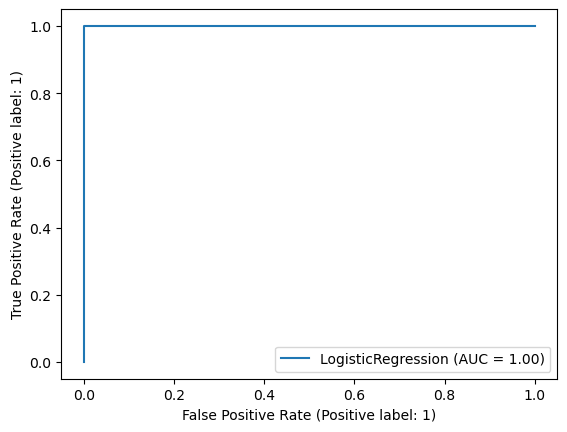

In [22]:
plot_roc_curve(regressor,selected_X_train,y_train)
auc =   roc_auc_score(y_train, y_pred)
print("Area under the curve is",auc)


In [23]:
import statsmodels.api as sm

model = sm.Logit(y_train, selected_X_train).fit(method='bfgs')
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 26
         Function evaluations: 29
         Gradient evaluations: 29
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                   69
Model:                          Logit   Df Residuals:                       59
Method:                           MLE   Df Model:                            9
Date:                Mon, 17 Oct 2022   Pseudo R-squ.:                   1.000
Time:                        22:38:30   Log-Likelihood:            -1.4901e-05
converged:                       True   LL-Null:                       -26.718
Covariance Type:            nonrobust   LLR p-value:                 2.417e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
mean1         -3.9488   1.86e+05  -2.1

## 2 a) v) Test the classifier on the test set

In [24]:
#For l=1 
# on Test Data

l= 1
X_test,y_test = create_dataset(test_path,l,"binary")

#print(len(y_test))

regressor_test = LogisticRegression(max_iter=200)
rfecv_test = RFECV(estimator = regressor_test, cv=StratifiedKFold(5), scoring='accuracy', n_jobs = -1)
rfecv_test = rfecv_test.fit(X_test, y_test)

pruned_features_test = X_test[X_test.columns[rfecv_test.support_]]
pruned_features_test.columns




Index(['mean1', 'mean3', 'max3', 'mean5', 'max5', 'max6'], dtype='object')

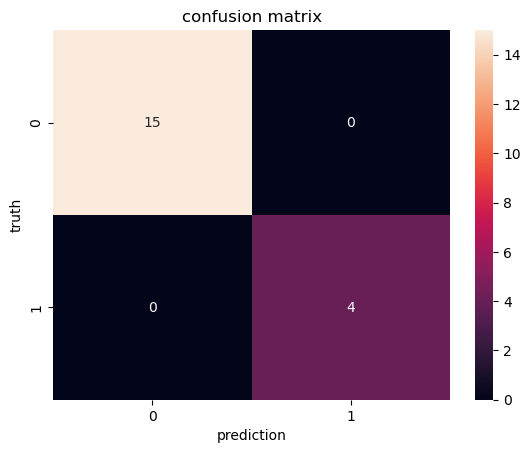

In [25]:
selected_X_test = pruned_features_test
regressor_test = LogisticRegression(max_iter=200).fit(selected_X_test, y_test)
y_pred = regressor_test.predict(selected_X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot=True, ax=ax, fmt='g')
ax.set_xlabel('prediction')
ax.set_ylabel('truth')
ax.set_title('confusion matrix')
plt.show()

Area under the curve is 1.0


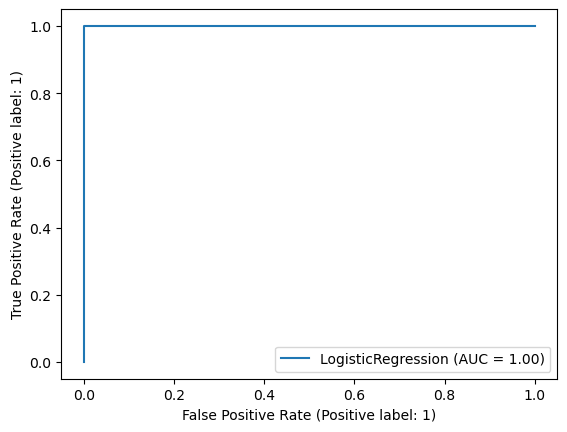

In [26]:
plot_roc_curve(regressor_test,selected_X_test,y_test)
auc =   roc_auc_score(y_test, y_pred)
print("Area under the curve is",auc)

In [27]:
print("Cross Validation Acuuracy is", rfecv_train.score(X_train, y_train))
print("Test Accuracy is",rfecv_test.score(X_test, y_test) )

Cross Validation Acuuracy is 1.0
Test Accuracy is 1.0


## 2 a) vi) 
Q) Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?  
Ans) Yes, the stats model summary also highlights the same 

        Complete Separation: The results show that there iscomplete separation.
        In this case the Maximum Likelihood Estimator does not exist and the parameters
        are not identified.


## 2 a) vii. 
Q) From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling andadjust its parameters. Report the confusion matrix, ROC, and AUC of the model  

Ans) There is class imbalance because in training data out of 69 samples only 9 are bending while the other 60 activities are non-beding activities. Class balance can be dealth with by using SMOTE

In [28]:
#%pip install imblearn
from imblearn.over_sampling import SMOTE 

In [29]:
smote = SMOTE(random_state=42)
sampled_X_train, sampled_y_train = smote.fit_resample(X_train,y_train)

regressor = LogisticRegression(max_iter=200)
rfecv = RFECV(estimator = regressor, cv=StratifiedKFold(5), scoring='accuracy', n_jobs = -1)
rfecv = rfecv.fit(sampled_X_train, sampled_y_train)

pruned_features = sampled_X_train[sampled_X_train.columns[rfecv_test.support_]]
print(pruned_features.columns)
# print(rfecv.ranking_)


Index(['mean1', 'mean3', 'max3', 'mean5', 'max5', 'max6'], dtype='object')


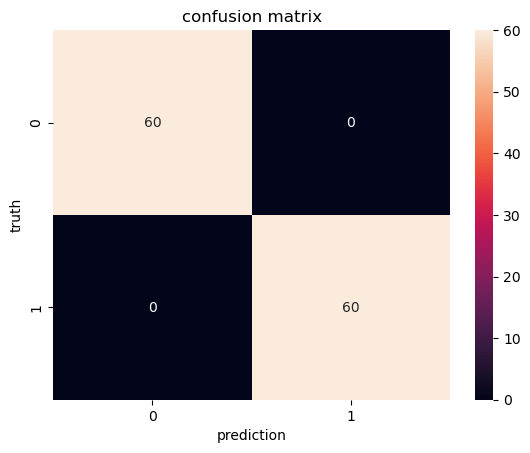

In [30]:
from sklearn import preprocessing

selected_X_train = pruned_features
regressor = LogisticRegression(max_iter=200).fit(selected_X_train, sampled_y_train)
y_pred = regressor.predict(selected_X_train)

cnf_matrix = confusion_matrix(sampled_y_train, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot=True, ax=ax, fmt='g')
ax.set_xlabel('prediction')
ax.set_ylabel('truth')
ax.set_title('confusion matrix')
plt.show()

Area under the curve is 1.0


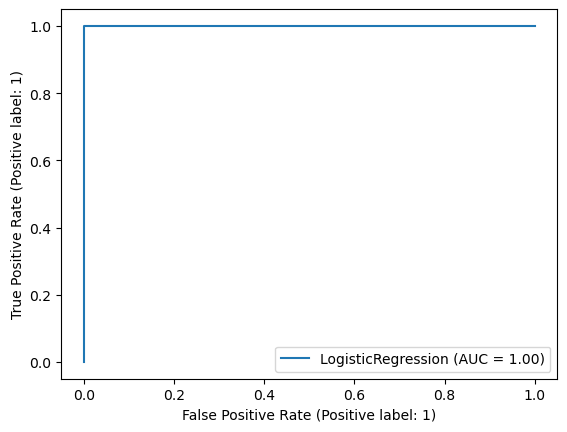

In [31]:
plot_roc_curve(regressor,selected_X_train,sampled_y_train)
auc =   roc_auc_score(sampled_y_train, y_pred)
print("Area under the curve is",auc)

## 2 (b) Binary Classification Using L1-penalized logistic regression
## 2 b i) 
Repeat 4(a)iii using L1-penalized logistic regression,8 i.e. instead of using p-
values for variable selection, use L1 regularization.

In [32]:
#L1 penalized Binary Classifier
#Train Data
from sklearn.linear_model import LogisticRegressionCV

score_df = pd.DataFrame(columns=["l","score"])
for l in range(1,21):
    
    X_train, y_train = create_dataset(train_path,l,"binary")
    
    regressor = LogisticRegressionCV(max_iter=200,cv=StratifiedKFold(5), penalty='l1', n_jobs=-1, solver='liblinear')
    regressor = regressor.fit(X_train, y_train)
    score = regressor.score(X_train,y_train)

    score_df = score_df.append({"l":l, "score":score},ignore_index=True)

print(score_df) 

       l     score
0    1.0  0.985507
1    2.0  1.000000
2    3.0  1.000000
3    4.0  1.000000
4    5.0  1.000000
5    6.0  1.000000
6    7.0  1.000000
7    8.0  1.000000
8    9.0  1.000000
9   10.0  1.000000
10  11.0  1.000000
11  12.0  1.000000
12  13.0  1.000000
13  14.0  1.000000
14  15.0  1.000000
15  16.0  1.000000
16  17.0  0.985507
17  18.0  1.000000
18  19.0  1.000000
19  20.0  1.000000


Highest Accuracy is for l=2-16,18-20

In [33]:
#Best L1 penalized Binary Classifier (l=2)
#train data


score_df = pd.DataFrame(columns=["l","score"])
l =2
X_train, y_train = create_dataset(train_path,l,"binary")

regressor = LogisticRegressionCV(max_iter=200,cv=StratifiedKFold(5), penalty='l1', n_jobs=-1, solver='liblinear')
regressor = regressor.fit(X_train, y_train)
score = regressor.score(X_train,y_train)

score_df = score_df.append({"l":l, "score":score},ignore_index=True)

print(score_df) 
            


     l  score
0  2.0    1.0


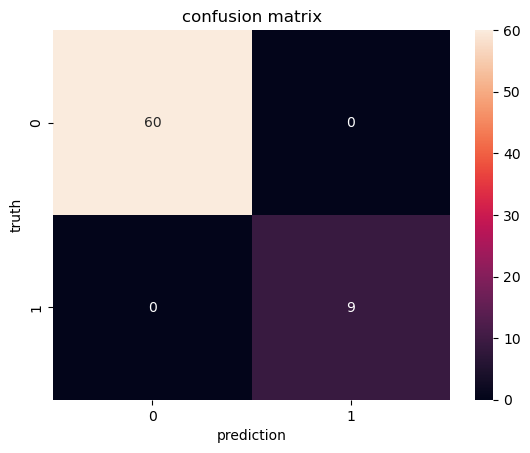

In [34]:
y_pred = regressor.predict(X_train)

cnf_matrix = confusion_matrix(y_train, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot=True, ax=ax, fmt='g')
ax.set_xlabel('prediction')
ax.set_ylabel('truth')
ax.set_title('confusion matrix')
plt.show()

Area under the curve is 1.0


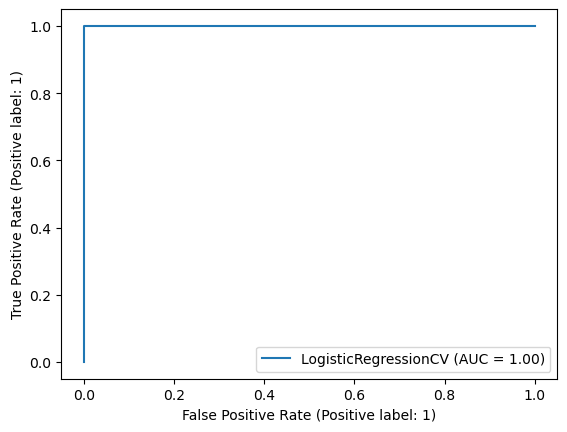

In [35]:
plot_roc_curve(regressor,X_train,y_train)  
auc =   roc_auc_score(y_train, y_pred)
print("Area under the curve is",auc)



## 2 b) ii. 
Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?  
Ans) Regularization helps to uncover groups of important features that may be correlated in such an interconnected way with the output that they will be missed by varaiable selection.
L1-penalized is easier to implement than variable selection using p-values

#  2 (c) Multi-class Classification (The Realistic Case)

i) Find the best l in the same way as you found it in 2(b)i to build an L1- penalized multinomial regression model to classify all activities in your train- ing set.10 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible.11

In [36]:
# Multinomial Logistic Regression

score_df = pd.DataFrame(columns=["l","score"])
for l in range(1,21):
    
    X_train, y_train = create_dataset(train_path, l, "multi")
    
    regressor = LogisticRegressionCV(max_iter=200,cv=5, penalty='l1', n_jobs=-1, multi_class='multinomial', solver='saga')
    regressor = regressor.fit(X_train, y_train)
    score = regressor.score(X_train,y_train)

    score_df = score_df.append({"l":l, "score":score},ignore_index=True)

print("l,score for Multinomial Logistic Regression")
print(score_df) 
            


l,score for Multinomial Logistic Regression
       l     score
0    1.0  0.971014
1    2.0  1.000000
2    3.0  1.000000
3    4.0  1.000000
4    5.0  1.000000
5    6.0  1.000000
6    7.0  1.000000
7    8.0  1.000000
8    9.0  1.000000
9   10.0  1.000000
10  11.0  1.000000
11  12.0  1.000000
12  13.0  1.000000
13  14.0  1.000000
14  15.0  1.000000
15  16.0  1.000000
16  17.0  1.000000
17  18.0  1.000000
18  19.0  1.000000
19  20.0  1.000000


In [37]:
#Best LogisticRegressionCV model for l=2
#on Train Data

score_df = pd.DataFrame(columns=["l","score"])

l=2
X_train, y_train = create_dataset(train_path, l, "multi")


regressor = LogisticRegressionCV(max_iter=200,cv=5, penalty='l1', n_jobs=-1, multi_class='multinomial', solver='saga')
regressor = regressor.fit(X_train, y_train)
score = regressor.score(X_train,y_train)

score_df = score_df.append({"l":l, "score":score},ignore_index=True)

print(score_df) 
            


     l  score
0  2.0    1.0


In [38]:
#Test error for best multinomial logistic regression (l=2)

score_df = pd.DataFrame(columns=["l","test error"])

l=2
X_test, y_test = create_dataset(test_path, l, "multi")

y_pred = regressor.predict(X_test)
multi_lr_score = 1-regressor.score(X_test,y_test)

score_df = score_df.append({"l":l, "test error":multi_lr_score},ignore_index=True)

print(score_df) 
            


     l  test error
0  2.0    0.157895


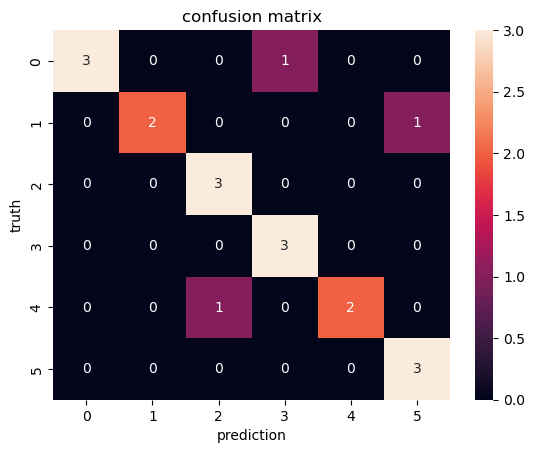

In [39]:
y_pred = regressor.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot=True, ax=ax, fmt='g')
ax.set_xlabel('prediction')
ax.set_ylabel('truth')
ax.set_title('confusion matrix')
plt.show()

## 2 c ii) 
Repeat 2(c)i using a Naive Bayes’ classifier. Use both Gaussian and Multi- nomial priors and compare the results.

In [40]:
#Gaussian NB
from sklearn.naive_bayes import GaussianNB

score_df = pd.DataFrame(columns=["l","score"])
for l in range(1,21):
    
    X_train, y_train = create_dataset(train_path, l, "multi")
    gnb = GaussianNB()
    nb_gauss = gnb.fit(X_train, y_train)
    score = nb_gauss.score(X_train,y_train)

    score_df = score_df.append({"l":l, "score":score},ignore_index=True)

print("l,score for Gaussian Naive Bayes")
print(score_df) 
            


l,score for Gaussian Naive Bayes
       l     score
0    1.0  0.971014
1    2.0  0.985507
2    3.0  0.985507
3    4.0  0.985507
4    5.0  0.985507
5    6.0  0.985507
6    7.0  0.985507
7    8.0  0.985507
8    9.0  0.985507
9   10.0  0.971014
10  11.0  0.985507
11  12.0  0.985507
12  13.0  0.985507
13  14.0  0.985507
14  15.0  0.985507
15  16.0  0.985507
16  17.0  0.985507
17  18.0  0.985507
18  19.0  0.985507
19  20.0  0.985507


In [41]:
#Best Gaussian NB at l=2
score_df = pd.DataFrame(columns=["l","score"])

l=2
X_train, y_train = create_dataset(train_path, l, "multi")

gnb = GaussianNB()
nb_gauss = gnb.fit(X_train, y_train)
score = nb_gauss.score(X_train,y_train)

score_df = score_df.append({"l":l, "score":score},ignore_index=True)

print("Best l,score for Gaussian Naive Bayes")
print(score_df) 

Best l,score for Gaussian Naive Bayes
     l     score
0  2.0  0.985507


In [42]:
#Test score for best Gaussian NB

score_df = pd.DataFrame(columns=["l","test error"])

l=2

X_test, y_test = create_dataset(test_path, l, "multi")
gauss_nb_score = 1-regressor.score(X_test,y_test)

score_df = score_df.append({"l":l, "test error":gauss_nb_score},ignore_index=True)


print(score_df) 
            


     l  test error
0  2.0    0.157895


In [43]:
#Multinomial NB

from sklearn.naive_bayes import MultinomialNB

score_df = pd.DataFrame(columns=["l","score"])
for l in range(1,21):
    
    X_train, y_train = create_dataset(train_path, l, "multi")

    mnb = MultinomialNB()
    nb_multi = mnb.fit(X_train, y_train)
    score = nb_multi.score(X_train,y_train)

    score_df = score_df.append({"l":l, "score":score},ignore_index=True)
print("l,score for Multinomial Naive Bayes")
print(score_df) 
            


l,score for Multinomial Naive Bayes
       l     score
0    1.0  0.884058
1    2.0  0.942029
2    3.0  0.942029
3    4.0  0.956522
4    5.0  0.927536
5    6.0  0.927536
6    7.0  0.956522
7    8.0  0.942029
8    9.0  0.956522
9   10.0  0.942029
10  11.0  0.971014
11  12.0  0.971014
12  13.0  0.971014
13  14.0  0.971014
14  15.0  0.971014
15  16.0  0.971014
16  17.0  0.971014
17  18.0  0.971014
18  19.0  0.971014
19  20.0  0.971014


best(l,score) is (11,0.971014)

In [44]:
#Best Multinomial NB @ l=11

from sklearn.naive_bayes import MultinomialNB


score_df = pd.DataFrame(columns=["l","score"])
l=11

X_train, y_train = create_dataset(train_path, l, "multi")

mnb = MultinomialNB()
nb_multi = mnb.fit(X_train, y_train)
score = nb_multi.score(X_train,y_train)

score_df = score_df.append({"l":l, "score":score},ignore_index=True)
print("Best Multinomial Naive Bayes")
print(score_df) 
            


Best Multinomial Naive Bayes
      l     score
0  11.0  0.971014


In [45]:
#Test error for Best Multinomial NB @ l=11

from sklearn.naive_bayes import MultinomialNB


score_df = pd.DataFrame(columns=["l","test error"])
l=11

X_test, y_test = create_dataset(test_path, l, "multi")

multi_nb_score = 1-nb_multi.score(X_test,y_test)

score_df = score_df.append({"l":l, "test error":multi_nb_score},ignore_index=True)

print("Best Multinomial Naive Bayes")
print(score_df) 
            


Best Multinomial Naive Bayes
      l  test error
0  11.0    0.105263


In [46]:
total_error_df = pd.DataFrame({"Multinomial Logistic R":multi_lr_score, "Gaussian NB": gauss_nb_score, "Multinomial NB": multi_nb_score},index=[0])
total_error_df

,Multinomial Logistic R,Gaussian NB,Multinomial NB
0,0.157895,0.157895,0.105263


From the test error we can see that Multinomial NB is the best for this problem

## 3)ISLR  4.8.3

![title](ISLR4.8.3.png)

## 3)ISLR  4.8.7

![title](ISLR4.8.7.png)

## Refrences

https://stackoverflow.com/questions/33503993/read-in-all-csv-files-from-a-directory-using-python  
https://thispointer.com/pandas-skip-rows-while-reading-csv-file-to-a-dataframe-using-read_csv-in-python/  
https://notebook.community/tsarouch/python_minutes/core/Confidence_Prediction_Intervals  
https://stackoverflow.com/questions/53481285/python-os-walk-displays-mixed-windows-and-unix-paths  
https://www.adamsmith.haus/python/answers/how-to-create-an-empty-dataframe-with-column-names-in-python#:~:text=Use%20pandas.,an%20empty%20DataFrame%20with%20column_names%20.  
https://stackoverflow.com/questions/23853553/python-pandas-how-to-read-only-first-n-rows-of-csv-files-in  
https://stackoverflow.com/questions/14257373/how-to-skip-the-headers-when-processing-a-csv-file-using-python  
https://stackoverflow.com/questions/952914/how-do-i-make-a-flat-list-out-of-a-list-of-lists  
https://stackoverflow.com/questions/27275236/how-to-select-all-columns-whose-names-start-with-x-in-a-pandas-dataframe  
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html  
https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers  
https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/  
https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html  
https://scikit-learn.org/stable/modules/naive_bayes.html  
